In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import glob 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
from scipy.stats import linregress
import sklearn.linear_model as LR
import scipy.stats as stats


## Dask Cluster

In [35]:
print('...setting up dask client...')
if 'client' in locals():
    client.shutdown()
    print('...shutdown client...')
else:
    print('client does not exist yet')



...setting up dask client...
...shutdown client...


In [2]:
print('...setting up dask client...')
if 'client' in locals():
    client.shutdown()
    print('...shutdown client...')
else:
    print('client does not exist yet')


# ### ++++++ dask NCAR client: 
from distributed import Client
from dask_jobqueue import PBSCluster
project_num = 'NAML0001' #what project key dfo you have? 

cluster = PBSCluster(account=project_num,walltime='12:00:00',cores=1, memory='50GB',shared_temp_directory='/glade/derecho/scratch/wchapman/tmp',queue='casper')
cluster.scale(jobs=40)
client = Client(cluster)
#### ----- dask NCAR client:
client

...setting up dask client...
client does not exist yet


Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/wchapman/diehard/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/wchapman/diehard/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://128.117.208.62:36937,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/wchapman/diehard/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
lvlv = 200
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/archive/supermodel/CAM6_FHIST_f09_g16/*h1*.nc'))
def _preprocess(ds):
    return ds[['U','V','T','Q']].sel(lev=lvlv,method='nearest')
DSc6 = xr.open_mfdataset(FNS[:],preprocess=_preprocess, parallel=True, chunks={'time':10})
DSc6['Umag'] = np.sqrt(DSc6['U']**2 + DSc6['V']**2)
print('loading')
DSc6.load()

loading


/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 12.54 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


<xarray.Dataset>
Dimensions:  (time: 5598, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lev      float64 197.9
  * time     (time) object 1979-01-01 00:00:00 ... 1987-12-31 18:00:00
Data variables:
    U        (time, lat, lon) float32 -3.066 -3.078 -3.089 ... -6.483 -6.802
    V        (time, lat, lon) float32 0.5831 0.5161 0.4488 ... -14.72 -14.57
    T        (time, lat, lon) float32 214.1 214.1 214.1 ... 213.2 213.2 213.2
    Q        (time, lat, lon) float32 6.051e-06 6.051e-06 ... 3.756e-06
    Umag     (time, lat, lon) float32 3.121 3.121 3.121 ... 16.08 16.08 16.08
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FHIST_f09_g16
    logname:           fsc082
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_6

In [4]:
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/archive/supermodel/CAM5_FHIST_f09_g16/*h1*.nc'))
def _preprocess(ds):
    return ds[['U','V','T','Q']].sel(lev=lvlv,method='nearest')
DSc5 = xr.open_mfdataset(FNS[:],preprocess=_preprocess, parallel=True, chunks={'time':10})
DSc5['Umag'] = np.sqrt(DSc5['U']**2 + DSc5['V']**2)
print('loading')
DSc5.load()

loading


<xarray.Dataset>
Dimensions:  (time: 2921, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lev      float64 197.9
  * time     (time) object 1979-01-01 00:00:00 ... 1985-12-31 18:00:00
Data variables:
    U        (time, lat, lon) float32 -3.066 -3.078 -3.089 ... 15.32 15.37 15.42
    V        (time, lat, lon) float32 0.5831 0.5161 0.4488 ... 2.617 2.282 1.947
    T        (time, lat, lon) float32 214.1 214.1 214.1 ... 193.0 193.0 193.0
    Q        (time, lat, lon) float32 6.051e-06 6.051e-06 ... 2.633e-06
    Umag     (time, lat, lon) float32 3.121 3.121 3.121 ... 15.54 15.54 15.54
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FHIST5_f09_g16_v2
    logname:           fsc082
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_6

In [5]:
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/archive/supermodel/super_cam56/*h1*.nc'))
def _preprocess(ds):
    return ds[['U','V','T','Q']].sel(lev=lvlv,method='nearest')
DSsuper6 = xr.open_mfdataset(FNS[:],preprocess=_preprocess, parallel=True, chunks={'time':10})
DSsuper6['Umag'] = np.sqrt(DSsuper6['U']**2 + DSsuper6['V']**2)
print('loading')
DSsuper6.load()

loading


<xarray.Dataset>
Dimensions:  (time: 4380, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lev      float64 197.9
  * time     (time) object 1979-01-01 00:00:00 ... 1981-12-31 18:00:00
Data variables:
    U        (time, lat, lon) float32 -3.066 -3.078 -3.089 ... 16.74 16.82 16.89
    V        (time, lat, lon) float32 0.5831 0.5161 0.4488 ... 3.789 3.423 3.056
    T        (time, lat, lon) float32 214.1 214.1 214.1 ... 213.8 213.8 213.8
    Q        (time, lat, lon) float32 6.051e-06 6.051e-06 ... 3.492e-06
    Umag     (time, lat, lon) float32 3.121 3.121 3.121 ... 17.16 17.16 17.16
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              CAM6_Betzy1
    logname:           fsc082
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_6
    history:           Sat May 11 15:06:56 2024: ncrcat CAM6_Betzy1.cam.h1.19...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [6]:
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/archive/supermodel/super_cam5/*h1*.nc'))
def _preprocess(ds):
    return ds[['U','V','T','Q']].sel(lev=lvlv,method='nearest')
DSsuper5 = xr.open_mfdataset(FNS[:],preprocess=_preprocess, parallel=True, chunks={'time':10})
DSsuper5['Umag'] = np.sqrt(DSsuper5['U']**2 + DSsuper5['V']**2)
print('loading')
DSsuper5.load()

loading


<xarray.Dataset>
Dimensions:  (time: 2920, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lev      float64 197.9
  * time     (time) object 1979-01-01 00:00:00 ... 1980-12-31 18:00:00
Data variables:
    U        (time, lat, lon) float32 -3.066 -3.078 -3.089 ... 2.016 1.864 1.712
    V        (time, lat, lon) float32 0.5831 0.5161 0.4488 ... -6.955 -6.994
    T        (time, lat, lon) float32 214.1 214.1 214.1 ... 213.4 213.4 213.4
    Q        (time, lat, lon) float32 6.051e-06 6.051e-06 ... 4.219e-06
    Umag     (time, lat, lon) float32 3.121 3.121 3.121 3.121 ... 7.2 7.2 7.2
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              CAM5_Betzy1
    logname:           fsc082
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_6
    history:           Sat May 11 15:06:44 2024: ncrcat CAM5_Betzy1.cam.h1.19...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

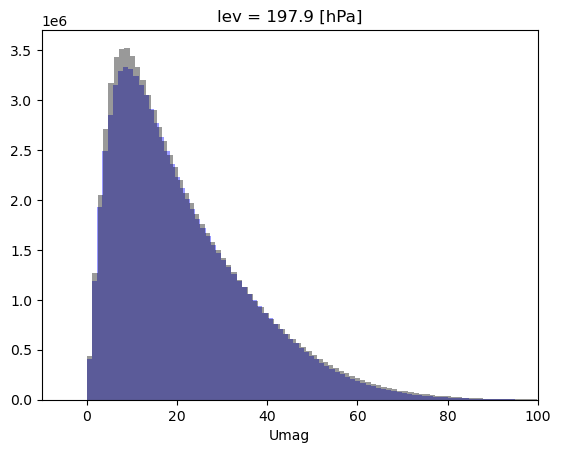

In [7]:
n1, x1, _ = DSc6['Umag'].sel(time=slice('1979','1979')).plot.hist(bins=100,alpha=0.4,color='blue')
n2, x2, _ = DSc5['Umag'].sel(time=slice('1979','1979')).plot.hist(bins=100,alpha=0.4,color='k')
# n3, x3, _ = DSsuper5['Umag'].sel(time=slice('1979','1980')).plot.hist(bins=100,alpha=0.4,color='green')
# DSc5['V'].plot.hist(bins=100,alpha=0.4,color='green')
# plt.plot(x, density(x))
plt.xlim([-10,100])
plt.show()

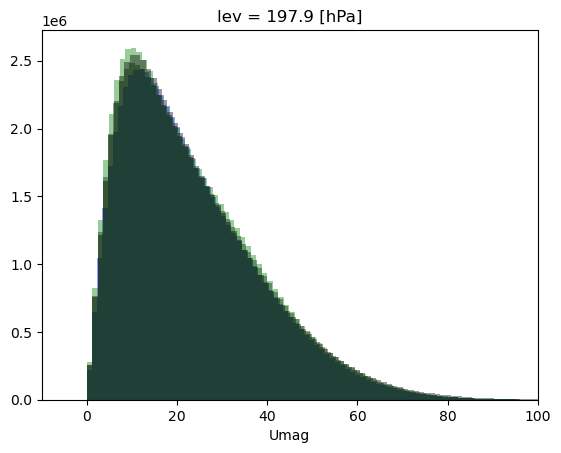

In [8]:
n1, x1, _ = DSc6['Umag'].sel(time=slice('1979','1979'),lat=slice(-75,75)).plot.hist(bins=100,alpha=0.4,color='blue')
n2, x2, _ = DSsuper6['Umag'].sel(time=slice('1979','1979'),lat=slice(-75,75)).plot.hist(bins=100,alpha=0.4,color='k')
n3, x3, _ = DSsuper5['Umag'].sel(time=slice('1979','1979'),lat=slice(-75,75)).plot.hist(bins=100,alpha=0.4,color='green')
n4, x4, _ = DSc5['Umag'].sel(time=slice('1979','1979'),lat=slice(-75,75)).plot.hist(bins=100,alpha=0.4,color='k')

# DSc5['V'].plot.hist(bins=100,alpha=0.4,color='green')
# plt.plot(x, density(x))
plt.xlim([-10,100])
plt.show()

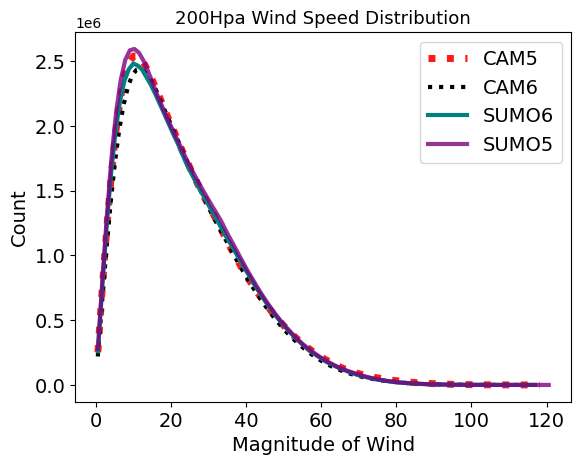

In [13]:
bin_centers4 = 0.5*(x4[1:]+x4[:-1])
plt.plot(bin_centers4,n4,color='Red',alpha=0.9,linewidth=5,label='CAM5', linestyle=':') ## using bin_centers rather than edges
# n4, x4, _ = DSc5['Umag'].sel(time=slice('1979','1979'),lat=slice(-75,75)).plot.hist(bins=100,alpha=0.4,color='green')

bin_centers1 = 0.5*(x1[1:]+x1[:-1])
plt.plot(bin_centers1,n1,color='k',linewidth=3,label='CAM6', linestyle=':') ## using bin_centers rather than edges

bin_centers2 = 0.5*(x2[1:]+x2[:-1])
plt.plot(bin_centers2,n2,color='teal',linewidth=3,label='SUMO6') ## using bin_centers rather than edges

bin_centers3 = 0.5*(x3[1:]+x3[:-1])
plt.plot(bin_centers3,n3,alpha=0.8,color='purple',linewidth=3,label='SUMO5') ## using bin_centers rather than edges

plt.legend(fontsize=14)
plt.xlabel('Magnitude of Wind', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('200Hpa Wind Speed Distribution',fontsize=13)
plt.savefig(f'./Wind_Histogram_{lvlv}mb.png',bbox_inches='tight',dpi=400)
plt.show()

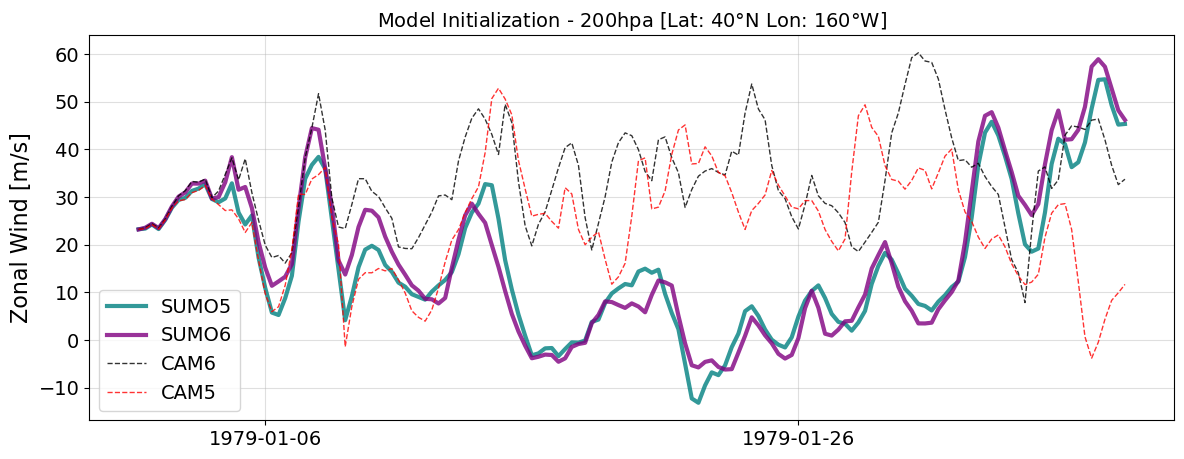

In [14]:
plt.figure(figsize=(14,5))
DSsuper5['U'].sel(time=slice('1979','1980')).sel(lat=40,lon=200,method='nearest').isel(time=slice(1,150)).plot(linewidth=3,color='teal',alpha=0.8,label='SUMO5')
DSsuper6['U'].sel(time=slice('1979','1980')).sel(lat=40,lon=200,method='nearest').isel(time=slice(1,150)).plot(linewidth=3,color='purple',alpha=0.8,label='SUMO6')
DSc6['U'].sel(time=slice('1979','1980')).sel(lat=40,lon=200,method='nearest').isel(time=slice(1,150)).plot(linewidth=1,color='k',alpha=0.8,linestyle='--',label='CAM6')
DSc5['U'].sel(time=slice('1979','1980')).sel(lat=40,lon=200,method='nearest').isel(time=slice(1,150)).plot(linewidth=1,color='r',alpha=0.8,linestyle='--',label='CAM5')

plt.legend(fontsize=14)
plt.title('Model Initialization - 200hpa [Lat: 40$\degree$N Lon: 160$\degree$W]',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('Zonal Wind [m/s]',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True,alpha=0.4)
plt.savefig(f'./Initialization_Fig_{lvlv}.png',bbox_inches='tight',dpi=400)
plt.show()


In [64]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)
clevs = np.arange(.15,1,.035)
newcolors = np.array([[0.19215686, 0.21176471, 0.58431373, 1.        ],
       [0.2248366 , 0.31470588, 0.63496732, 1.        ],
       [0.25751634, 0.41764706, 0.68562092, 1.        ],
       [0.31666667, 0.51372549, 0.73431373, 1.        ],
       [0.39346405, 0.60522876, 0.78169935, 1.        ],
       [0.47287582, 0.69281046, 0.82745098, 1.        ],
       [0.5627451 , 0.76470588, 0.86666667, 1.        ],
       [0.65261438, 0.83660131, 0.90588235, 1.        ],
       [0.73986928, 0.88496732, 0.93333333, 1.        ],
       [0.82647059, 0.92745098, 0.95784314, 1.        ],
       [0.89869281, 0.96078431, 0.93529412, 1.        ],
       [0.94934641, 0.98039216, 0.84215686, 1.        ],
       [1.        , 1.        , 1         , 1.        ],
       [0.99836601, 0.94934641, 0.67222222, 1.        ],
       [0.99673203, 0.89869281, 0.59542484, 1.        ],
       [0.99509804, 0.82941176, 0.51862745, 1.        ],
       [0.99346405, 0.74771242, 0.44183007, 1.        ],
       [0.98921569, 0.66111111, 0.37058824, 1.        ],
       [0.9745098 , 0.55490196, 0.32156863, 1.        ],
       [0.95980392, 0.44869281, 0.27254902, 1.        ],
       [0.91895425, 0.34771242, 0.22614379, 1.        ],
       [0.87156863, 0.24803922, 0.18039216, 1.        ],
       [0.81045752, 0.15686275, 0.15228758, 1.        ],
       [0.72875817, 0.07843137, 0.15065359, 1.        ],
       [0.64705882, 0.        , 0.14901961, 1.        ]])
cmapzzz = ListedColormap(newcolors)
cmapzzz.set_over((0.64705882, 0.        , 0.14901961, 1.        ))
cmapzzz.set_under((0.19215686, 0.21176471, 0.58431373, 1.))
bbox_props = dict( fc="white", ec="k", lw=1)

..go time..
1: <xarray.DataArray 'U' ()>
array(0.96284167)
Coordinates:
    lev      float64 197.9
2: <xarray.DataArray 'U' ()>
array(0.24821672)
Coordinates:
    lev      float64 197.9


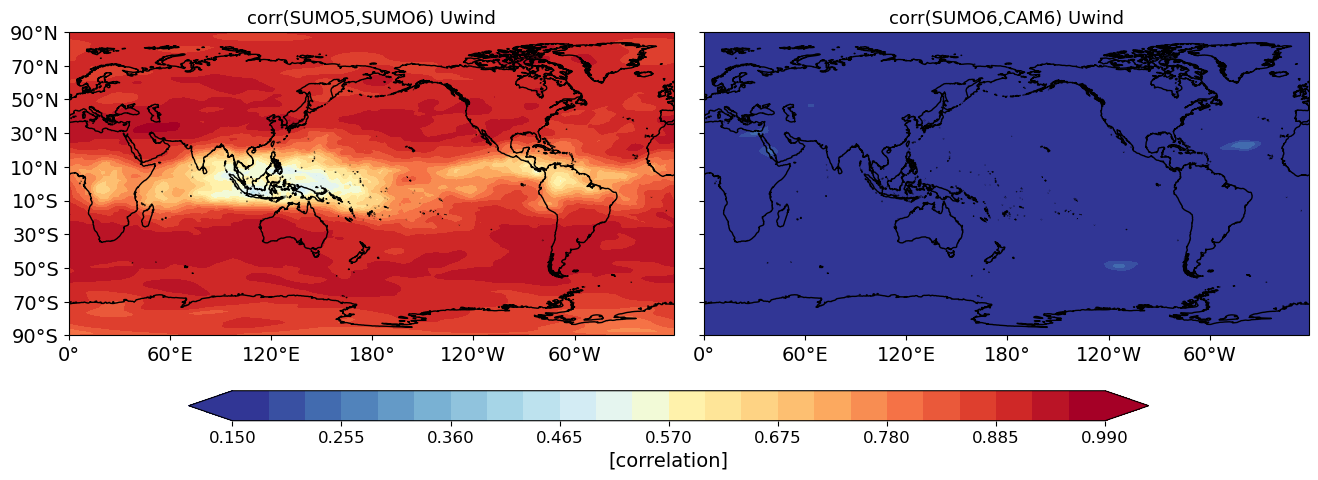

In [65]:
DSc6_rolling = DSc6['U'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper6_rolling = DSsuper6['U'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper5_rolling = DSsuper5['U'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
print('..go time..')

proj = ccrs.PlateCarree(central_longitude=180)
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection': proj}, sharey=True)

correlation = xr.corr(DSsuper5['U'].sel(time=slice('1979','1980-12-31'))-DSsuper5_rolling, DSsuper6['U'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('1:',np.max(plotter))


ax1.coastlines('50m')
f = ax1.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax1.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.xaxis.set_major_formatter(lon_formatter)

ax1.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('corr(SUMO5,SUMO6) Uwind', fontsize=13)
ax1.tick_params(labelsize=14)


correlation = xr.corr(DSc6['U'].sel(time=slice('1979','1980-12-31'))-DSc6_rolling, DSsuper6['U'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('2:',np.max(plotter))

ax2.coastlines('50m')
f = ax2.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax2.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax2.xaxis.set_major_formatter(lon_formatter)

ax2.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('corr(SUMO6,CAM6) Uwind', fontsize=13)
ax2.tick_params(labelsize=14)

# Hide y-axis labels on all but the first column
plt.setp(ax2.get_yticklabels(), visible=False)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(f, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[correlation]',fontsize=14)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig(f'./corr_Uwind{lvlv}mb.png',bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
DSc6_rolling = DSc6['V'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper6_rolling = DSsuper6['V'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper5_rolling = DSsuper5['V'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
print('..go time..')


proj = ccrs.PlateCarree(central_longitude=180)
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection': proj}, sharey=True)

correlation = xr.corr(DSsuper5['V'].sel(time=slice('1979','1980-12-31'))-DSsuper5_rolling, DSsuper6['V'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('1:',np.max(plotter))


ax1.coastlines('50m')
f = ax1.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax1.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.xaxis.set_major_formatter(lon_formatter)

ax1.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('corr(SUMO5,SUMO6) Vwind', fontsize=13)
ax1.tick_params(labelsize=14)


correlation = xr.corr(DSc6['V'].sel(time=slice('1979','1980-12-31'))-DSc6_rolling, DSsuper6['V'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('1:',np.max(plotter))


ax2.coastlines('50m')
f = ax2.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax2.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax2.xaxis.set_major_formatter(lon_formatter)

ax2.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('corr(SUMO6,CAM6) Vwind', fontsize=13)
ax2.tick_params(labelsize=14)

# Hide y-axis labels on all but the first column
plt.setp(ax2.get_yticklabels(), visible=False)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(f, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[correlation]',fontsize=14)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig(f'./corr_Vwind{lvlv}mb.png',bbox_inches='tight',dpi=400)
plt.show()

..go time..
1: <xarray.DataArray 'V' ()>
array(0.95024427)
Coordinates:
    lev      float64 197.9


In [ ]:
DSc6_rolling = DSc6['T'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper6_rolling = DSsuper6['T'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper5_rolling = DSsuper5['T'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
print('..go time..')


proj = ccrs.PlateCarree(central_longitude=180)
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection': proj}, sharey=True)

correlation = xr.corr(DSsuper5['T'].sel(time=slice('1979','1980-12-31'))-DSsuper5_rolling, DSsuper6['T'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('1:',np.max(plotter))


ax1.coastlines('50m')
f = ax1.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax1.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.xaxis.set_major_formatter(lon_formatter)

ax1.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('corr(SUMO5,SUMO6) T', fontsize=13)
ax1.tick_params(labelsize=14)


correlation = xr.corr(DSc6['T'].sel(time=slice('1979','1980-12-31'))-DSc6_rolling, DSsuper6['T'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('1:',np.max(plotter))


ax2.coastlines('50m')
f = ax2.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax2.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax2.xaxis.set_major_formatter(lon_formatter)

ax2.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('corr(SUMO6,CAM6) T', fontsize=13)
ax2.tick_params(labelsize=14)

# Hide y-axis labels on all but the first column
plt.setp(ax2.get_yticklabels(), visible=False)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(f, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[correlation]',fontsize=14)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig(f'./corr_T{lvlv}mb.png',bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
DSc6_rolling = DSc6['Q'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper6_rolling = DSsuper6['Q'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
DSsuper5_rolling = DSsuper5['Q'].sel(time=slice('1979','1980-12-31')).rolling(time=30*4,min_periods=1, center=True).mean()
print('..go time..')


proj = ccrs.PlateCarree(central_longitude=180)
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection': proj}, sharey=True)

correlation = xr.corr(DSsuper5['Q'].sel(time=slice('1979','1980-12-31'))-DSsuper5_rolling, DSsuper6['Q'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('1:',np.max(plotter))


ax1.coastlines('50m')
f = ax1.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax1.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.xaxis.set_major_formatter(lon_formatter)

ax1.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('corr(SUMO5,SUMO6) Q', fontsize=13)
ax1.tick_params(labelsize=14)


correlation = xr.corr(DSc6['Q'].sel(time=slice('1979','1980-12-31'))-DSc6_rolling, DSsuper6['Q'].sel(time=slice('1979','1980-12-31'))-DSsuper6_rolling, dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation
print('1:',np.max(plotter))


ax2.coastlines('50m')
f = ax2.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax2.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax2.xaxis.set_major_formatter(lon_formatter)

ax2.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('corr(SUMO6,CAM6) Q', fontsize=13)
ax2.tick_params(labelsize=14)

# Hide y-axis labels on all but the first column
plt.setp(ax2.get_yticklabels(), visible=False)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(f, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[correlation]',fontsize=14)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig(f'./corr_Q{lvlv}mb.png',bbox_inches='tight',dpi=400)
plt.show()

In [16]:
rm dask-worker*

In [ ]:
CNTRL = DSc5['U'].sel(time=slice('1979','1981-01-01'))
SUMO6 = DSsuper6['U'].sel(time=slice('1979','1981-01-01'))

In [16]:
# Band Pass STD
def bandpass_filter_via_fft_3d(data, low_period, high_period, sampling_interval=1):
    """
    Apply a bandpass filter to a 3D time series (time, lat, lon) using FFT and inverse FFT, optimized for vectorized operations.
    
    Parameters:
    - data: numpy array, the input time series data of shape (time, lat, lon).
    - low_period: float, the lower bound of the period (in days) to allow through the filter.
    - high_period: float, the upper bound of the period (in days) to allow through the filter.
    - sampling_interval: float, the sampling interval of the time series (default is 1 day).
    
    Returns:
    - filtered_data: numpy array, the bandpass-filtered time series.
    """
    # Perform FFT on the entire data array along the time axis
    fft_data = np.fft.fft(data, axis=0)
    
    # Generate frequency axis and define bandpass frequency limits
    frequencies = np.fft.fftfreq(data.shape[0], d=sampling_interval)
    f_low = 1 / high_period  # Convert period to frequency
    f_high = 1 / low_period  # Convert period to frequency

    # Create a bandpass filter mask
    bandpass_mask = (np.abs(frequencies) >= f_low) & (np.abs(frequencies) <= f_high)

    # Apply the mask to the FFT data
    filtered_fft_data = fft_data * bandpass_mask[:, np.newaxis, np.newaxis]

    # Apply inverse FFT to get the filtered time series back in the time domain
    filtered_data = np.fft.ifft(filtered_fft_data, axis=0).real

    return filtered_data

In [30]:
CNTRL = DSc6['U'].sel(time=slice('1979','1981-01-01'))
SUMO6 = DSsuper6['U'].sel(time=slice('1979','1981-01-01'))

clevs = np.arange(-0, 12.5, 0.5)
bluey = mpl.cm.get_cmap('turbo', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
cmapzzz = ListedColormap(newcolors)
cbar_lab ='[W/m$^2$]'
pf_scale = 1


/glade/derecho/scratch/wchapman/tmp/ipykernel_48042/2054719902.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bluey = mpl.cm.get_cmap('turbo', len(clevs))


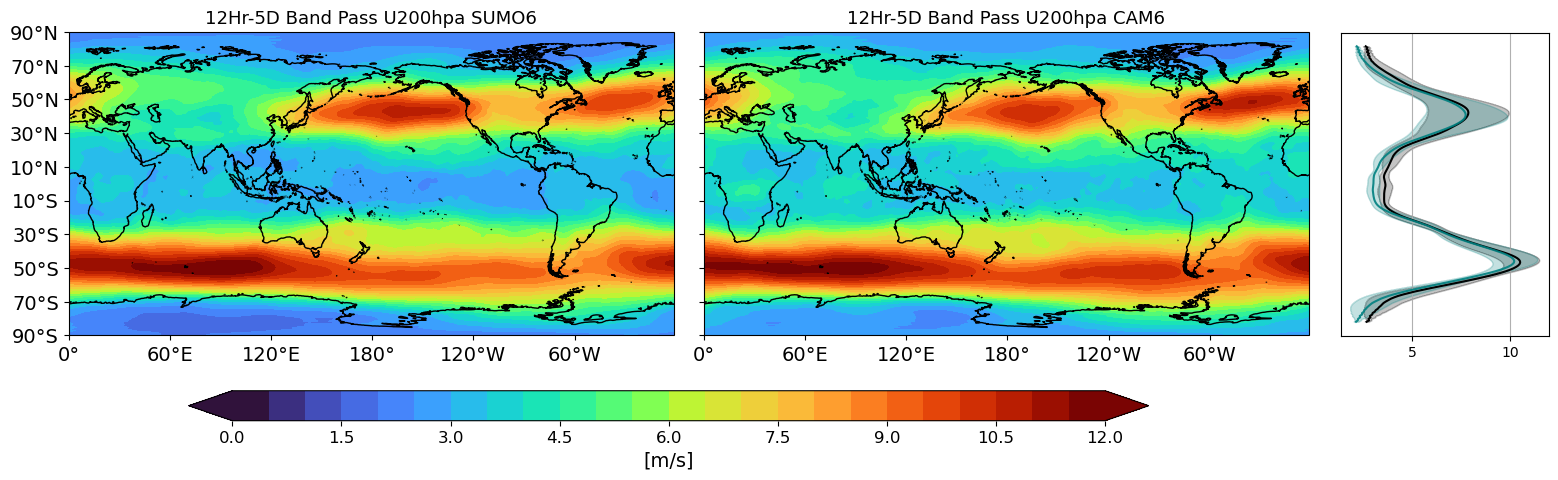

In [33]:
high_period=5
low_period=.5
sampling_interval=0.25
CNTRLbp = bandpass_filter_via_fft_3d(CNTRL, low_period, high_period, sampling_interval=.25)
SUMO6bp = bandpass_filter_via_fft_3d(SUMO6, low_period, high_period, sampling_interval=.25)

proj = ccrs.PlateCarree(central_longitude=180)
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection': proj}, sharey=True)

lons = CNTRL['lon']
lats = CNTRL['lat']
plotter = np.std(SUMO6bp,axis=0)
psumo = np.mean(plotter,axis=1)
psumos = np.std(plotter,axis=1)

ax1.coastlines('50m')
f = ax1.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax1.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.xaxis.set_major_formatter(lon_formatter)

ax1.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('12Hr-5D Band Pass U200hpa SUMO6', fontsize=13)
ax1.tick_params(labelsize=14)

lons = CNTRL['lon']
lats = CNTRL['lat']
plotter = np.std(CNTRLbp,axis=0)
pcntrl = np.mean(plotter,axis=1)
pcntrls = np.std(plotter,axis=1)

ax2.coastlines('50m')
f = ax2.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax2.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax2.xaxis.set_major_formatter(lon_formatter)

ax2.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('12Hr-5D Band Pass U200hpa CAM6', fontsize=13)
ax2.tick_params(labelsize=14)

# Hide y-axis labels on all but the first column
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = fig.add_axes([0.92,.242, .13, .505]) 
ax3.plot(pcntrl,lats,color='k')
ax3.plot(pcntrl+pcntrls,lats,color='k',linewidth=0.2,linestyle=":")
ax3.plot(pcntrl-pcntrls,lats,color='k',linewidth=0.2,linestyle=":")
ax3.fill_betweenx(lats,pcntrl-pcntrls,pcntrl+pcntrls,color='k',alpha=0.23)

ax3.plot(psumo,lats,color='teal',alpha=.9)
ax3.plot(psumo+psumos,lats,color='teal',alpha=0.5,linewidth=0.2,linestyle=":")
ax3.plot(psumo-psumos,lats,color='teal',alpha=0.5,linewidth=0.2,linestyle=":")
ax3.fill_betweenx(lats,psumo-psumos,psumo+psumos,color='teal',alpha=0.23)
ax3.grid(True)
ax3.set_yticks([])

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(f, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[m/s]',fontsize=14)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig('./U_BP_12hr5D.png',bbox_inches='tight',dpi=400)
plt.show()

/glade/derecho/scratch/wchapman/tmp/ipykernel_48042/2906903284.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bluey = mpl.cm.get_cmap('turbo', len(clevs))


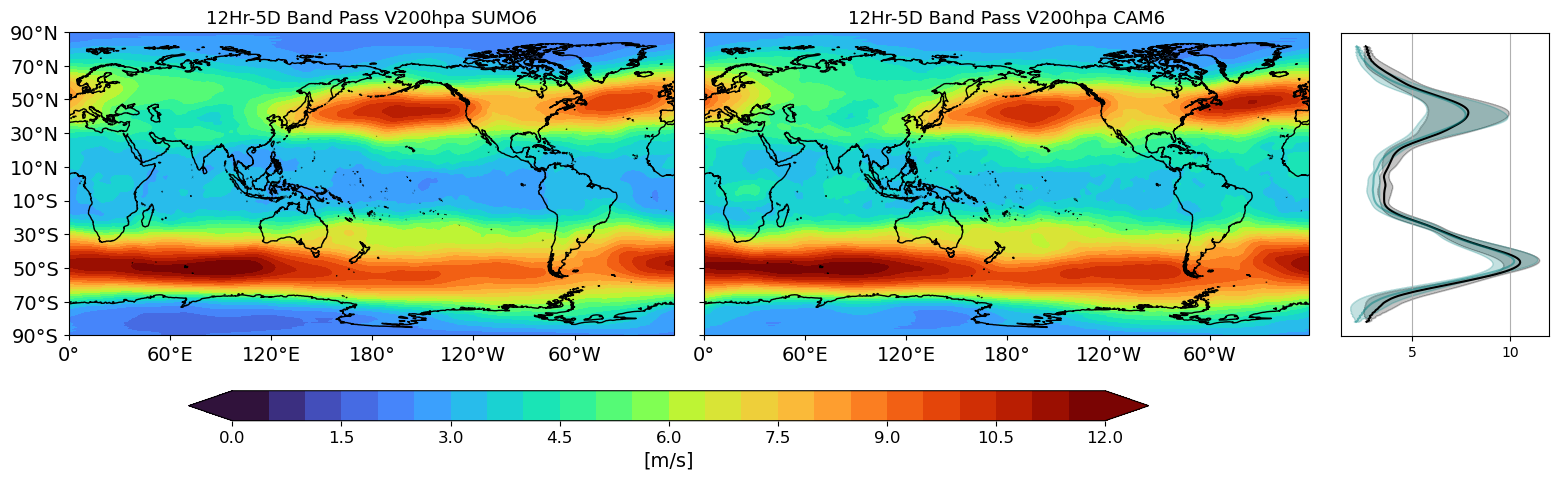

In [34]:
CNTRL = DSc6['V'].sel(time=slice('1979','1981-01-01'))
SUMO6 = DSsuper6['V'].sel(time=slice('1979','1981-01-01'))

clevs = np.arange(-0, 12.5, .5)
bluey = mpl.cm.get_cmap('turbo', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
cmapzzz = ListedColormap(newcolors)
cbar_lab ='[W/m$^2$]'
pf_scale = 1

high_period=5
low_period=.5
sampling_interval=0.25
CNTRLbp = bandpass_filter_via_fft_3d(CNTRL, low_period, high_period, sampling_interval=.25)
SUMO6bp = bandpass_filter_via_fft_3d(SUMO6, low_period, high_period, sampling_interval=.25)

proj = ccrs.PlateCarree(central_longitude=180)
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection': proj}, sharey=True)

lons = CNTRL['lon']
lats = CNTRL['lat']
plotter = np.std(SUMO6bp,axis=0)
psumo = np.mean(plotter,axis=1)
psumos = np.std(plotter,axis=1)

ax1.coastlines('50m')
f = ax1.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax1.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.xaxis.set_major_formatter(lon_formatter)

ax1.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('12Hr-5D Band Pass V200hpa SUMO6', fontsize=13)
ax1.tick_params(labelsize=14)

lons = CNTRL['lon']
lats = CNTRL['lat']
plotter = np.std(CNTRLbp,axis=0)
pcntrl = np.mean(plotter,axis=1)
pcntrls = np.std(plotter,axis=1)

ax2.coastlines('50m')
f = ax2.contourf(lons-180, lats, plotter, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax2.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax2.xaxis.set_major_formatter(lon_formatter)

ax2.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title('12Hr-5D Band Pass V200hpa CAM6', fontsize=13)
ax2.tick_params(labelsize=14)

# Hide y-axis labels on all but the first column
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = fig.add_axes([0.92,.242, .13, .505]) 
ax3.plot(pcntrl,lats,color='k')
ax3.plot(pcntrl+pcntrls,lats,color='k',linewidth=0.2,linestyle=":")
ax3.plot(pcntrl-pcntrls,lats,color='k',linewidth=0.2,linestyle=":")
ax3.fill_betweenx(lats,pcntrl-pcntrls,pcntrl+pcntrls,color='k',alpha=0.23)

ax3.plot(psumo,lats,color='teal',alpha=0.5)
ax3.plot(psumo+psumos,lats,color='teal',alpha=0.5,linewidth=0.2,linestyle=":")
ax3.plot(psumo-psumos,lats,color='teal',alpha=0.5,linewidth=0.2,linestyle=":")
ax3.fill_betweenx(lats,psumo-psumos,psumo+psumos,color='teal',alpha=0.23)
ax3.grid(True)
ax3.set_yticks([])

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(f, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='[m/s]',fontsize=14)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig('./V_BP_12hr5D.png',bbox_inches='tight',dpi=400)
plt.show()

In [26]:
rm dask-worker*

## Spectrum of Variability:

In [15]:
def overlapping_segments1D(x, segment_length, overlap=0.0):
    """Divides array into overlapping segments
    Parameters
    ----------
    x : 
        input 1D array
    segment_length :
        length of each segment
    overlap : float, optional
        fraction of overlapping between segments. The default overlap is zero.
    Returns
    -------
    segments :
        ndarray with number of segments as the first dimension and segment length in the
        second dimension.
    Notes
    -----
    For this function to work segment_length times overlap has to be an integer. 
    The length of the input array len(x) divided by segment_length also has to be an integer.
    """
    
    assert isinstance(x, np.ndarray), "x must be a Numpy array"
    assert x.ndim == 1, "x must be a 1D Numpy array"
    
    N = len(x)
    assert (N/segment_length).is_integer(), "The number of segments must be an integer"
    assert (overlap*segment_length).is_integer(), "The number of points to overlap must be an integer"
    
    n_seg = N//segment_length    
    left = range(0, N-segment_length+1, round((1-overlap)*segment_length))
    segments = []
    for l in left:
        r = l + segment_length
        segments.append(x[l:r])
    segments = np.array(segments)
    return segments

In [157]:
%%time
from scipy.signal import detrend
CNTRL = DSc6['U'].sel(time=slice('1979','1981-01-01')).values 
SUMO6 = DSsuper6['U'].sel(time=slice('1979','1981-01-01')).values
highest = 0

Vvar = np.zeros([192,288])

for ii in range(192):
    for jj in range(288):
        arr_4848 = overlapping_segments1D(SUMO6[:2900,ii,jj], 725, overlap=0.4)
        fvv = np.fft.fft(detrend(arr_4848[:,:],axis=-1), axis=-1)
        freq = np.fft.rfftfreq(len(arr_4848[0,:]), 1)
        amp = abs(fvv[:, :600//2+1]/600)**2 
        amp[:,1:-1] = 2*amp[:, 1:-1]
        sbb = np.mean(amp, axis=0)
        var4848 = np.sum(sbb)
        
        
        arr_44 = overlapping_segments1D(CNTRL[:2900,ii,jj], 725, overlap=0.4)
        fvv = np.fft.fft(detrend(arr_44[:,:],axis=-1), axis=-1)
        freq = np.fft.rfftfreq(len(arr_44[0,:]), 1)
        amp = abs(fvv[:, :600//2+1]/600)**2 
        amp[:,1:-1] = 2*amp[:, 1:-1]
        sbb = np.mean(amp, axis=0)
        var44 = np.sum(sbb)
        
        vardiff = ((var4848 - var44)/var4848)*100
        
        if vardiff > highest: 
            highest = vardiff
            bangdict = {'indlat':ii,'indlon':jj,'lowest':highest}
            print(bangdict)
            
        Vvar[ii,jj]=vardiff
        

{'indlat': 3, 'indlon': 210, 'lowest': 0.3311459599169648}
{'indlat': 3, 'indlon': 211, 'lowest': 0.779159214151351}
{'indlat': 3, 'indlon': 212, 'lowest': 1.1652904548314602}
{'indlat': 3, 'indlon': 213, 'lowest': 1.4873519146769698}
{'indlat': 3, 'indlon': 214, 'lowest': 1.7420040771342553}
{'indlat': 3, 'indlon': 215, 'lowest': 1.9260360137597177}
{'indlat': 3, 'indlon': 216, 'lowest': 2.036687842158181}
{'indlat': 3, 'indlon': 217, 'lowest': 2.071389253159619}
{'indlat': 4, 'indlon': 210, 'lowest': 2.2360413820968033}
{'indlat': 4, 'indlon': 211, 'lowest': 2.714838878549989}
{'indlat': 4, 'indlon': 212, 'lowest': 3.1433361760085132}
{'indlat': 4, 'indlon': 213, 'lowest': 3.5180411690288156}
{'indlat': 4, 'indlon': 214, 'lowest': 3.835657067998289}
{'indlat': 4, 'indlon': 215, 'lowest': 4.093495364774469}
{'indlat': 4, 'indlon': 216, 'lowest': 4.287809435285157}
{'indlat': 4, 'indlon': 217, 'lowest': 4.415130231748267}
{'indlat': 4, 'indlon': 218, 'lowest': 4.471828474370156}
{'indl

In [171]:
clevs = np.arange(-40, 45, 5)
bluey = mpl.cm.get_cmap('RdYlBu_r', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)

/glade/derecho/scratch/wchapman/tmp/ipykernel_61817/3362013930.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bluey = mpl.cm.get_cmap('RdYlBu_r', len(clevs))


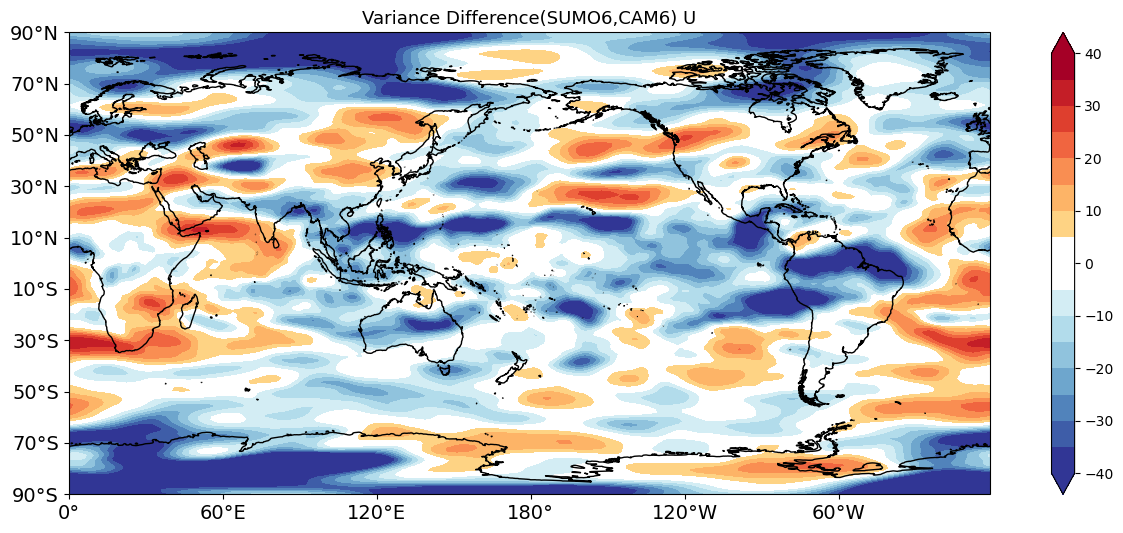

In [211]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

proj = ccrs.PlateCarree(central_longitude=180)
fig, ax1 = plt.subplots(1, 1, figsize=(16,6), subplot_kw={'projection': proj}, sharey=True)

correlation = xr.corr(DSsuper5['Q'], DSsuper6['Q'], dim='time')
lons = correlation['lon']
lats = correlation['lat']
plotter = correlation

ax1.coastlines('50m')
f = ax1.contourf(lons-180, lats, Vvar, levels = clevs ,cmap = cmapzzz, extend='both', transform=proj)
ax1.set_xticks(np.arange(-180,180,60))
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.xaxis.set_major_formatter(lon_formatter)

ax1.set_yticks(np.arange(-90,100,20))
lat_formatter = LatitudeFormatter(number_format='.0f')
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('Variance Difference(SUMO6,CAM6) U', fontsize=13)
ax1.tick_params(labelsize=14)
plt.colorbar(f)
plt.show()

276.9255272772028
196.96825500011983


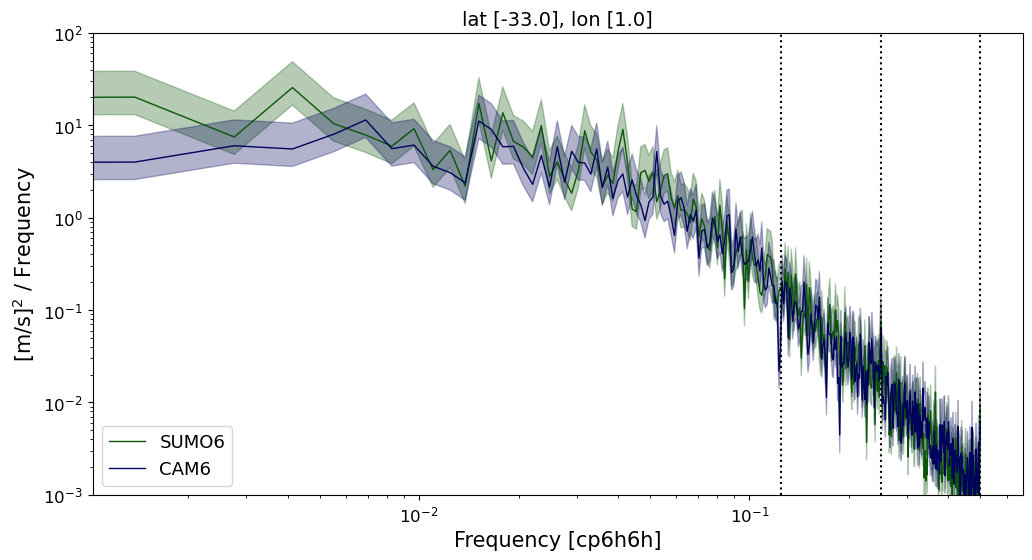

In [219]:
from scipy.signal import detrend
from scipy.stats.distributions import chi2

latdo=60
londo=1

arr_4848 = overlapping_segments1D(SUMO6[:2900,latdo,londo], 725, overlap=0.4)
fvv = np.fft.fft(detrend(arr_4848[:,:],axis=-1), axis=-1)
freq = np.fft.rfftfreq(len(arr_4848[0,:]), 1)
amp = abs(fvv[:, :725//2+1]/725)**2 
amp[:,1:-1] = 2*amp[:, 1:-1]
nu=2*arr_4848.shape[0]
##error based on chi-squared distribution
error_high = nu/chi2.ppf(0.1, df=nu)
error_low = nu/chi2.ppf(1-0.1, df=nu)
sbb_amp_high = error_high*np.mean(amp,axis=0)
sbb_amp_low = error_low*np.mean(amp,axis=0)
sbb = np.mean(amp, axis=0)
print(np.sum(sbb))
plt.figure(figsize=(12,6))
plt.subplot(1, 1, 1)
plt.loglog(freq, sbb,label='SUMO6',linewidth=1,color='xkcd:forest')
plt.fill_between(freq,sbb_amp_low,sbb_amp_high,color='xkcd:forest',alpha=0.3)


arr_44 = overlapping_segments1D(CNTRL[:2900,latdo,londo], 725, overlap=0.4)
fvv = np.fft.fft(detrend(arr_44[:,:],axis=-1), axis=-1)
freq = np.fft.rfftfreq(len(arr_44[0,:]), 1)
amp = abs(fvv[:, :725//2+1]/725)**2 
amp[:,1:-1] = 2*amp[:, 1:-1]
sbb_amp_high = error_high*np.mean(amp,axis=0)
sbb_amp_low = error_low*np.mean(amp,axis=0)
sbb = np.mean(amp, axis=0)
plt.subplot(1, 1, 1)
print(np.sum(sbb))
plt.loglog(freq, sbb,label='CAM6',linewidth=1,color='xkcd:dark blue')
plt.fill_between(freq,sbb_amp_low,sbb_amp_high,color='xkcd:dark blue',alpha=0.3)
plt.legend(fontsize=13)
# plt.ylim([10e-5,40])
plt.axvline(6/48,color='k',linestyle=':')
plt.axvline(6/24,color='k',linestyle=':')
plt.axvline(6/12,color='k',linestyle=':')
plt.xlabel('Frequency [cp6h6h]', size=15)
plt.ylabel('[m/s]$^2$ / Frequency', size=15)


# plt.xlim([0.0061,0.05])
plt.ylim([10e-4,10e1])
tit = f'lat [{str(np.round(DSc6["U"][:,latdo,londo]["lat"].values))}], lon [{str(np.round(DSc6["U"][:,latdo,londo]["lon"].values))}]'
plt.title(tit,fontsize=14)
plt.tick_params(labelsize=12) 
# print('check this:',np.var(detrend(arr_44[:,:],axis=-1)))
# print('check this:',np.var(detrend(arr_4848[:,:],axis=-1)))

In [220]:
%%time
from scipy.signal import detrend
CNTRL = DSc6['U'].sel(time=slice('1979','1981-01-01')).values 
SUMO6 = DSsuper6['U'].sel(time=slice('1979','1981-01-01')).values
highest = 0

Vvar = np.zeros([192,288])

for ii in range(192):
    for jj in range(288):
        arr_4848 = overlapping_segments1D(SUMO6[:2900,ii,jj], 725, overlap=0.4)
        fvv = np.fft.fft(detrend(arr_4848[:,:],axis=-1), axis=-1)
        freq = np.fft.rfftfreq(len(arr_4848[0,:]), 1)
        amp = abs(fvv[:, :600//2+1]/600)**2 
        amp[:,1:-1] = 2*amp[:, 1:-1]
        sbb = np.mean(amp, axis=0)
        var4848 = np.sum(sbb)
        
        
        arr_44 = overlapping_segments1D(CNTRL[:2900,ii,jj], 725, overlap=0.4)
        fvv = np.fft.fft(detrend(arr_44[:,:],axis=-1), axis=-1)
        freq = np.fft.rfftfreq(len(arr_44[0,:]), 1)
        amp = abs(fvv[:, :600//2+1]/600)**2 
        amp[:,1:-1] = 2*amp[:, 1:-1]
        sbb = np.mean(amp, axis=0)
        var44 = np.sum(sbb)
        
        vardiff = ((var44 - var4848)/var44)*100
        
        if vardiff > highest: 
            highest = vardiff
            bangdict = {'indlat':ii,'indlon':jj,'lowest':highest}
            print(bangdict)
            
        Vvar[ii,jj]=vardiff
        

{'indlat': 0, 'indlon': 0, 'lowest': 45.39756234692696}
{'indlat': 0, 'indlon': 119, 'lowest': 45.74334330319741}
{'indlat': 0, 'indlon': 120, 'lowest': 46.19341373149052}
{'indlat': 0, 'indlon': 121, 'lowest': 46.60158037830268}
{'indlat': 0, 'indlon': 122, 'lowest': 46.96763101838678}
{'indlat': 0, 'indlon': 123, 'lowest': 47.291505606998534}
{'indlat': 0, 'indlon': 124, 'lowest': 47.57329408778565}
{'indlat': 0, 'indlon': 125, 'lowest': 47.8132221030512}
{'indlat': 0, 'indlon': 126, 'lowest': 48.01164350738938}
{'indlat': 0, 'indlon': 127, 'lowest': 48.16902926014517}
{'indlat': 0, 'indlon': 128, 'lowest': 48.285959030867105}
{'indlat': 0, 'indlon': 129, 'lowest': 48.36310982891559}
{'indlat': 0, 'indlon': 130, 'lowest': 48.40124474102764}
{'indlat': 1, 'indlon': 264, 'lowest': 48.61918879334553}
{'indlat': 1, 'indlon': 265, 'lowest': 49.04429951053854}
{'indlat': 1, 'indlon': 266, 'lowest': 49.413873965432046}
{'indlat': 1, 'indlon': 267, 'lowest': 49.72810166487693}
{'indlat': 1, 

21.155370184620967
43.397602622638786


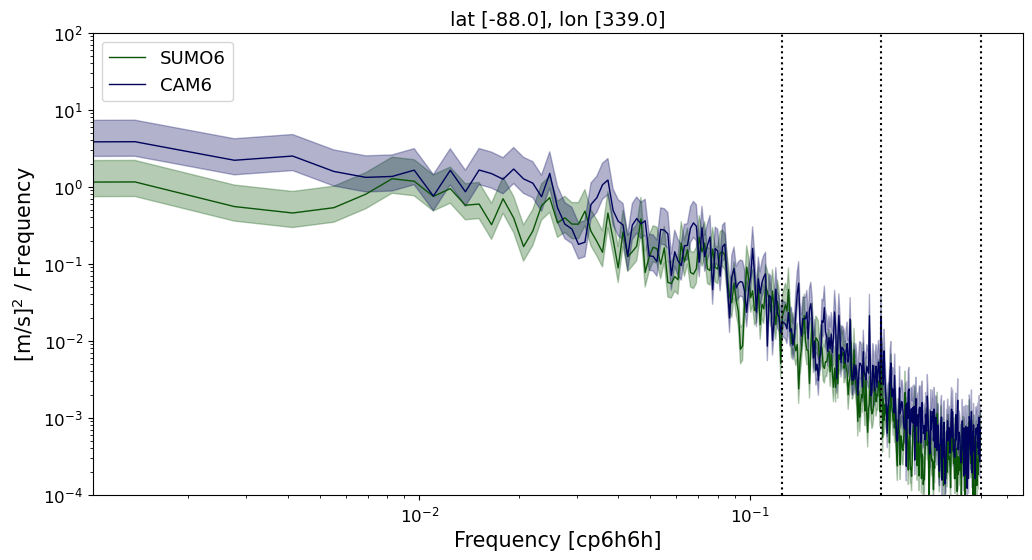

In [223]:
from scipy.signal import detrend
from scipy.stats.distributions import chi2

latdo=2
londo=271

arr_4848 = overlapping_segments1D(SUMO6[:2900,latdo,londo], 725, overlap=0.4)
fvv = np.fft.fft(detrend(arr_4848[:,:],axis=-1), axis=-1)
freq = np.fft.rfftfreq(len(arr_4848[0,:]), 1)
amp = abs(fvv[:, :725//2+1]/725)**2 
amp[:,1:-1] = 2*amp[:, 1:-1]
nu=2*arr_4848.shape[0]
##error based on chi-squared distribution
error_high = nu/chi2.ppf(0.1, df=nu)
error_low = nu/chi2.ppf(1-0.1, df=nu)
sbb_amp_high = error_high*np.mean(amp,axis=0)
sbb_amp_low = error_low*np.mean(amp,axis=0)
sbb = np.mean(amp, axis=0)
print(np.sum(sbb))
plt.figure(figsize=(12,6))
plt.subplot(1, 1, 1)
plt.loglog(freq, sbb,label='SUMO6',linewidth=1,color='xkcd:forest')
plt.fill_between(freq,sbb_amp_low,sbb_amp_high,color='xkcd:forest',alpha=0.3)


arr_44 = overlapping_segments1D(CNTRL[:2900,latdo,londo], 725, overlap=0.4)
fvv = np.fft.fft(detrend(arr_44[:,:],axis=-1), axis=-1)
freq = np.fft.rfftfreq(len(arr_44[0,:]), 1)
amp = abs(fvv[:, :725//2+1]/725)**2 
amp[:,1:-1] = 2*amp[:, 1:-1]
sbb_amp_high = error_high*np.mean(amp,axis=0)
sbb_amp_low = error_low*np.mean(amp,axis=0)
sbb = np.mean(amp, axis=0)
plt.subplot(1, 1, 1)
print(np.sum(sbb))
plt.loglog(freq, sbb,label='CAM6',linewidth=1,color='xkcd:dark blue')
plt.fill_between(freq,sbb_amp_low,sbb_amp_high,color='xkcd:dark blue',alpha=0.3)
plt.legend(fontsize=13)
# plt.ylim([10e-5,40])
plt.axvline(6/48,color='k',linestyle=':')
plt.axvline(6/24,color='k',linestyle=':')
plt.axvline(6/12,color='k',linestyle=':')
plt.xlabel('Frequency [cp6h6h]', size=15)
plt.ylabel('[m/s]$^2$ / Frequency', size=15)


# plt.xlim([0.0061,0.05])
plt.ylim([10e-5,10e1])
tit = f'lat [{str(np.round(DSc6["U"][:,latdo,londo]["lat"].values))}], lon [{str(np.round(DSc6["U"][:,latdo,londo]["lon"].values))}]'
plt.title(tit,fontsize=14)
plt.tick_params(labelsize=12) 
# print('check this:',np.var(detrend(arr_44[:,:],axis=-1)))
# print('check this:',np.var(detrend(arr_4848[:,:],axis=-1)))

In [233]:
print('...setting up dask client...')
if 'client' in locals():
    client.shutdown()
    print('...shutdown client...')
else:
    print('client does not exist yet')



...setting up dask client...
...shutdown client...


In [232]:
rm dask-worker*